# Model Comparison — Emission Point Classification with Temporal Architectures

This notebook performs a structured comparison of three neural network models applied to the task of classifying particle emission source points (E1, E2, E3) in a simulated industrial environment. The models evaluated are:

- **CNN1D**: Convolutional Neural Network over time-series windows;
- **LSTM**: Long Short-Term Memory network capturing temporal dependencies;
- **MLP**: A baseline Multi-Layer Perceptron operating on static aggregated features.

The input data for CNN1D and LSTM consists of **sliding windows of temporal sensor readings**, enabling the models to learn patterns over time. The MLP, in contrast, uses pre-aggregated statistical features and serves as a reference for non-temporal modeling.

---

## Notebook Structure

0. Load performance summary files for each model;
1. Display metrics in a comparison table;
2. Generate bar plots comparing performance indicators;
3. Generate radar plots comparing performance indicators.
---

This notebook is intended for **scientific validation and benchmarking**. It enables detailed performanc


In [1]:
# Importação de bibliotecas
import json
import pandas as pd
import matplotlib.pyplot as plt

# Carregamento dos arquivos JSON
with open('../results/final_cnn1d_summary.json') as f1, open('../results/final_lstm_summary.json') as f2, open('../results/final_mlp_summary.json') as f3:
    cnn1d = json.load(f1)
    lstm = json.load(f2)
    mlp = json.load(f3)

# Criação da tabela comparativa
data = {
    'Model': [cnn1d['Model Type'], lstm['Model Type'], mlp['Model Type']],
    'Test Accuracy': [cnn1d['Test Accuracy'], lstm['Test Accuracy'], mlp['Test Accuracy']],
    'Balanced Accuracy': [cnn1d['Balanced Accuracy'], lstm['Balanced Accuracy'], mlp['Balanced Accuracy']],
    'Macro Precision': [cnn1d['Macro Precision'], lstm['Macro Precision'], mlp['Macro Precision']],
    'Macro Recall': [cnn1d['Macro Recall'], lstm['Macro Recall'], mlp['Macro Recall']],
    'Macro F1-Score': [cnn1d['Macro F1-Score'], lstm['Macro F1-Score'], mlp['Macro F1-Score']],
    "Cohen's Kappa": [cnn1d["Cohen's Kappa"], lstm["Cohen's Kappa"], mlp["Cohen's Kappa"]]
}

df = pd.DataFrame(data)
df


,Model,Test Accuracy,Balanced Accuracy,Macro Precision,Macro Recall,Macro F1-Score,Cohen's Kappa
0,CNN1D,0.9575,0.9541,0.9634,0.9541,0.9561,0.9360
1,LSTM,0.9577,0.9543,0.9637,0.9543,0.9563,0.9364
2,MLP,0.2857,0.2831,0.3146,0.2831,0.2789,-0.0773


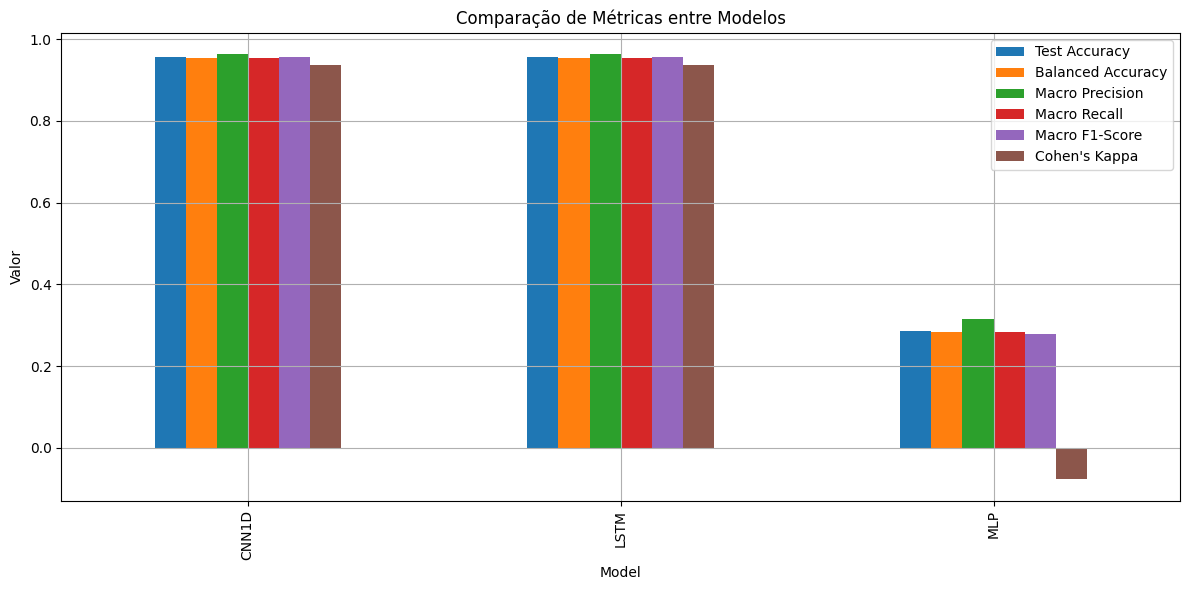

In [2]:
# Gráfico de barras comparativo
df.set_index('Model').plot(kind='bar', figsize=(12, 6), title='Comparação de Métricas entre Modelos')
plt.ylabel('Valor')
plt.grid(True)
plt.tight_layout()
plt.savefig('../results/ModelComparison_MetricsBar.png')
plt.show()


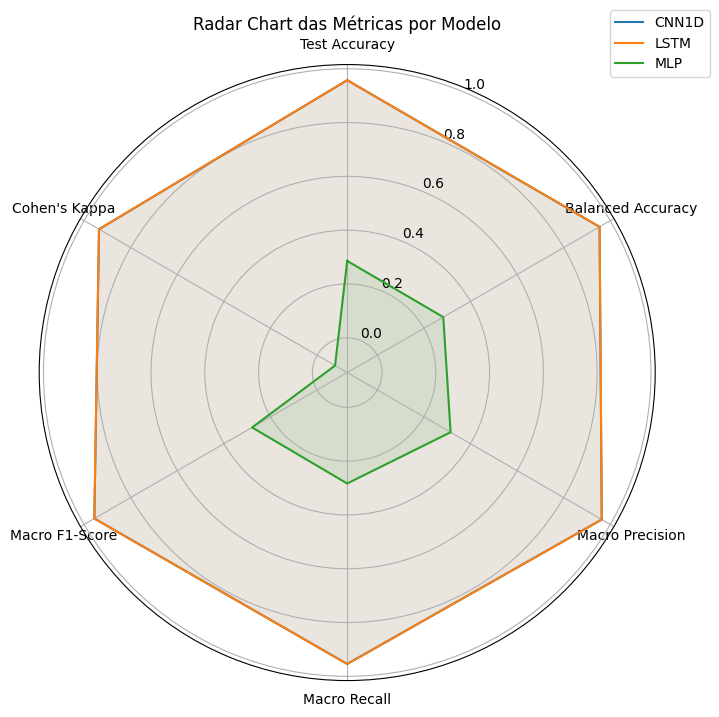

In [3]:
from math import pi
import numpy as np

labels = df.columns[1:]
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in df.iterrows():
    values = row[1:].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Model'])
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Radar Chart das Métricas por Modelo')
plt.savefig('../results/ModelComparison_MetricsRadar.png')
plt.show()


## Conclusão

A partir da comparação entre os modelos, observamos que:

- **CNN1D** e **LSTM** apresentaram desempenhos **praticamente idênticos**, com excelente acurácia e métricas equilibradas.
- O **MLP** teve desempenho **muito inferior**, mostrando-se inadequado para o problema atual.
- A **escolha entre CNN1D e LSTM** pode depender de outros fatores, como:
  - Tempo de treinamento;
  - Facilidade de interpretação;
  - Disponibilidade computacional.

Para este conjunto de dados, modelos que capturam dependências temporais (como CNN1D e LSTM) se mostraram mais eficazes.
